In [1]:
import pandas as pd

In [15]:
file_path = '/Users/yoonjiha/Desktop/파란학기/bluesemesterdata'

In [16]:
df = pd.read_csv(file_path + "/atom-chain-market.csv")
df

,_time,chainName,ath,athDate,atl,atlDate,cap,capChange24h,capChangeRatio24H,capRank,...,low24h,price,priceChangePercentage14d,priceChangePercentage1H,priceChangePercentage1Y,priceChangePercentage24H,priceChangePercentage30D,priceChangePercentage7d,supplyCirculating,totalVolume
0,2023-01-22T03:17:05.617Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.16,2020-03-13T02:27:44.591Z,3859684388,147701676,3.97905,22,...,12.71,13.23,28.957470,-0.485600,-66.135479,4.076443,49.739968,6.656563,292586163.8,286045792
1,2023-01-22T04:00:02.782Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.16,2020-03-13T02:27:44.591Z,3907744616,176277536,4.72408,22,...,12.74,13.40,30.548036,1.262951,-65.717793,5.109553,51.586867,7.972070,292586163.8,270717200
2,2023-01-22T05:00:02.824Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.16,2020-03-13T02:27:44.591Z,3927643247,184235063,4.92159,22,...,12.79,13.40,30.600500,0.109195,-65.704016,4.756726,51.647786,8.015461,292586163.8,278476575
3,2023-01-22T06:00:03.313Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.16,2020-03-13T02:27:44.591Z,3937783620,102299572,2.66719,22,...,12.93,13.43,30.878275,-0.008200,-65.631072,2.355746,51.970326,8.245199,292586163.8,256725694
4,2023-01-22T07:00:02.713Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.16,2020-03-13T02:27:44.591Z,3924998829,104038978,2.72285,22,...,12.93,13.40,30.615193,-0.020446,-65.700158,2.552304,51.664846,8.027613,292586163.8,248758707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,2023-04-14T09:59:01.944Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.16,2020-03-13T02:27:44.591Z,3507681128,205581994,6.22580,22,...,11.26,11.97,7.445475,1.296546,-51.603148,6.090325,-8.420835,5.673736,292586163.8,180955819
1940,2023-04-14T10:59:01.968Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.16,2020-03-13T02:27:44.591Z,3524783794,221736046,6.71307,22,...,11.28,12.04,8.032595,0.446129,-51.338690,6.467143,-7.920415,6.251174,292586163.8,186429847
1941,2023-04-14T12:00:03.586Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.16,2020-03-13T02:27:44.591Z,3498083709,180355505,5.43611,22,...,11.32,11.97,7.437773,-0.559009,-51.606617,5.551262,-8.427400,5.666161,292586163.8,190792631
1942,2023-04-14T13:00:03.269Z,cosmos,44.45,2022-01-17T00:34:41.497Z,1.16,2020-03-13T02:27:44.591Z,3527540730,213463319,6.44111,22,...,11.32,12.06,8.265298,1.067752,-51.233873,6.575718,-7.722075,6.480040,292586163.8,194247513


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _time                     1944 non-null   object 
 1   chainName                 1944 non-null   object 
 2   ath                       1944 non-null   float64
 3   athDate                   1944 non-null   object 
 4   atl                       1944 non-null   float64
 5   atlDate                   1944 non-null   object 
 6   cap                       1944 non-null   int64  
 7   capChange24h              1944 non-null   int64  
 8   capChangeRatio24H         1944 non-null   float64
 9   capRank                   1944 non-null   int64  
 10  change24h                 1944 non-null   float64
 11  changeRatio24H            1944 non-null   float64
 12  high24h                   1944 non-null   float64
 13  low24h                    1944 non-null   float64
 14  price   

## cap ARIMA 예측

### cap데이터만 뽑기

In [18]:
series = pd.DataFrame()

In [19]:
series['date'] = df['_time'].values
series['cap'] = df['cap'].values
series

,date,cap
0,2023-01-22T03:17:05.617Z,3859684388
1,2023-01-22T04:00:02.782Z,3907744616
2,2023-01-22T05:00:02.824Z,3927643247
3,2023-01-22T06:00:03.313Z,3937783620
4,2023-01-22T07:00:02.713Z,3924998829
...,...,...
1939,2023-04-14T09:59:01.944Z,3507681128
1940,2023-04-14T10:59:01.968Z,3524783794
1941,2023-04-14T12:00:03.586Z,3498083709
1942,2023-04-14T13:00:03.269Z,3527540730


In [20]:
series['date'] = pd.to_datetime(series['date'])
series = series.set_index('date')
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1944 entries, 2023-01-22 03:17:05.617000+00:00 to 2023-04-14 14:00:03.665000+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cap     1944 non-null   int64
dtypes: int64(1)
memory usage: 30.4 KB


In [21]:
series

,cap
date,
2023-01-22 03:17:05.617000+00:00,3859684388
2023-01-22 04:00:02.782000+00:00,3907744616
2023-01-22 05:00:02.824000+00:00,3927643247
2023-01-22 06:00:03.313000+00:00,3937783620
2023-01-22 07:00:02.713000+00:00,3924998829
...,...
2023-04-14 09:59:01.944000+00:00,3507681128
2023-04-14 10:59:01.968000+00:00,3524783794
2023-04-14 12:00:03.586000+00:00,3498083709


<Axes: xlabel='date'>

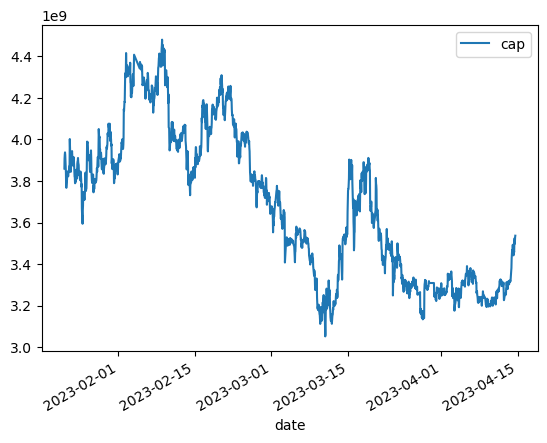

In [22]:
series.plot()

### 정상성 test

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' %result[0])
    print('p-value: %f' %result[1])
    print('Critical values: ')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
        
print('ADF Test: time series')
adf_test(series['cap'])
adf_test(series['cap'].diff().dropna())
adf_test(df['price'])
adf_test(df['priceChangePercentage1H'].diff().dropna())

ADF Test: time series
ADF Statistics: -1.768733
p-value: 0.396092
Critical values: 
	1%: -3.434
	5%: -2.863
	10%: -2.568
ADF Statistics: -43.905609
p-value: 0.000000
Critical values: 
	1%: -3.434
	5%: -2.863
	10%: -2.568
ADF Statistics: -1.761529
p-value: 0.399722
Critical values: 
	1%: -3.434
	5%: -2.863
	10%: -2.568
ADF Statistics: -14.263611
p-value: 0.000000
Critical values: 
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [25]:
from statsmodels.tsa.stattools import kpss

In [26]:
def kpss_test(df):
    statistic, p_value, n_lags, critical_values = kpss(df.values)
    
    print(f'KPSS statistics: {statistic}')
    print(f'p_value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values: ')
    for key, value in critical_values.items():
        print(f' {key} : {value}')

print('KPSS Test: time series')
kpss_test(series['cap'])
kpss_test(series['cap'].diff().dropna())
kpss_test(df['price'])
kpss_test(df['priceChangePercentage1H'].diff().dropna())

KPSS Test: time series
KPSS statistics: 5.1858481213229375
p_value: 0.01
num lags: 27
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.05953562016541806
p_value: 0.1
num lags: 13
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 5.183605868627661
p_value: 0.01
num lags: 27
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739
KPSS statistics: 0.05344212007296767
p_value: 0.1
num lags: 189
Critial Values: 
 10% : 0.347
 5% : 0.463
 2.5% : 0.574
 1% : 0.739


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available i

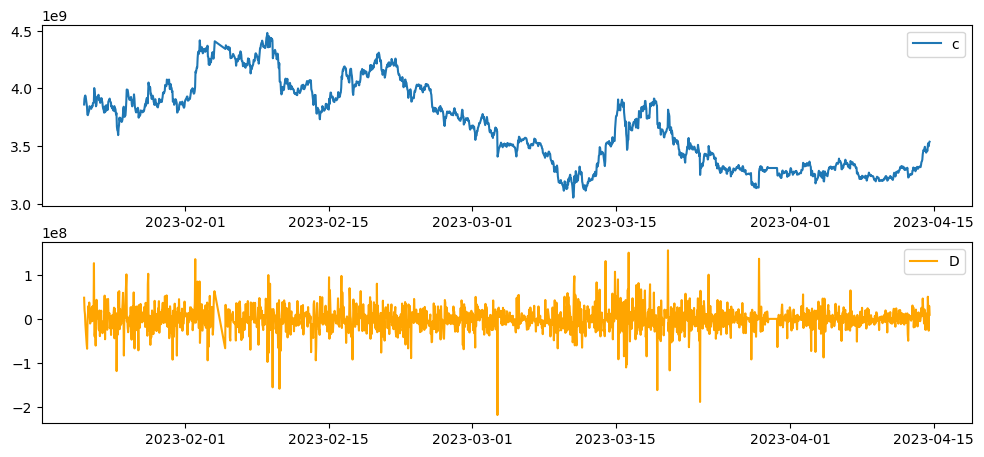

In [27]:
import matplotlib.pyplot as plt
# cap 차분 데이터
diff_series = series.cap.diff().dropna()

plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot(series)
plt.legend('cap data')
plt.subplot(312)
plt.plot(diff_series, 'orange')
plt.legend('Diff Data')
plt.show()

### ARIMA 모수 설정

In [28]:
!pip install pmdarima

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


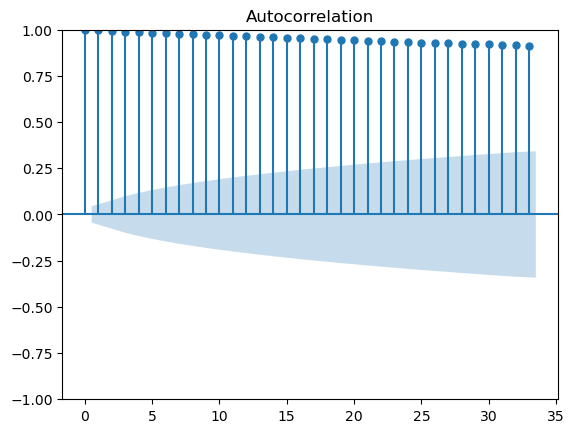

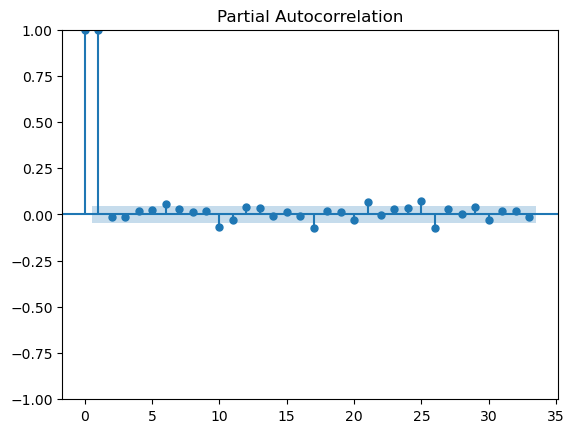

In [30]:
plot_acf(series)
plot_pacf(series)
plt.show()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


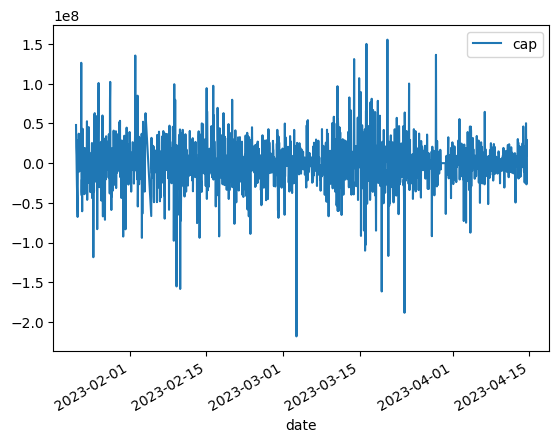

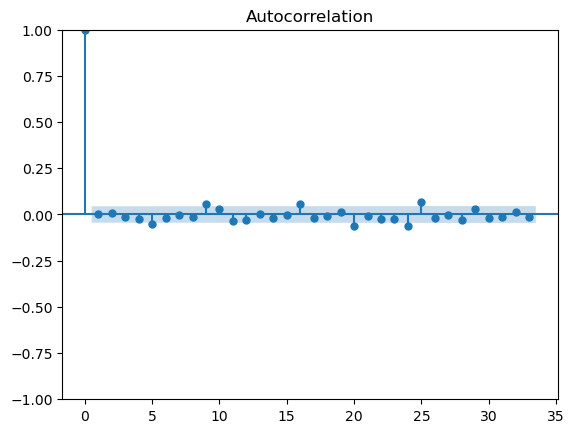

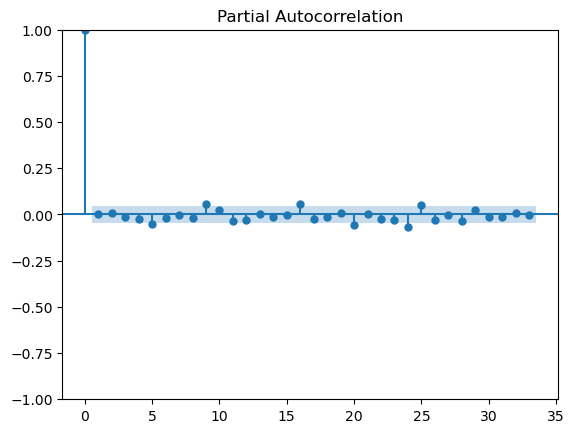

In [31]:
diff_1=series.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [32]:
from pmdarima.arima import auto_arima

# 파라미터 값 찾기
model_arima = auto_arima(series,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(series)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=72201.090, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=72200.323, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=72201.766, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=72203.743, Time=0.18 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=72205.262, Time=0.26 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=72205.080, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=72200.292, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=72201.933, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=72203.776, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=72203.847, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=72202.800, Time=0.71 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=72201.761, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=72203.764, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=72205.779, Time=0.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=72168.371, Time=2.40

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [33]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

# f = open('ARIMA(2,1,3)_cap_result.txt','w')

model = SARIMAX(series, order=(2,1,3), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
# print(model_fit.summary(),file=f)
print(model_fit.summary())

# f.close()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85696D+01    |proj g|=  9.41762D-02

At iterate    1    f=  1.85682D+01    |proj g|=  5.30652D-02

At iterate    2    f=  1.85679D+01    |proj g|=  3.32693D-02

At iterate    3    f=  1.85679D+01    |proj g|=  5.42442D-03

At iterate    4    f=  1.85679D+01    |proj g|=  1.45797D-03

At iterate    5    f=  1.85679D+01    |proj g|=  3.61053D-04

At iterate    6    f=  1.85679D+01    |proj g|=  7.41263D-04

At iterate    7    f=  1.85679D+01    |proj g|=  2.00720D-03

At iterate    8    f=  1.85679D+01    |proj g|=  4.85067D-03

At iterate    9    f=  1.85679D+01    |proj g|=  9.01036D-03

At iterate   10    f=  1.85678D+01    |proj g|=  1.62350D-02

At iterate   11    f=  1.85678D+01    |proj g|=  2.85059D-02

At iterate   12    f=  1.85677D+01    |proj g|=  5.08579D-02

At iterate   13    f=  1.8

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date'>

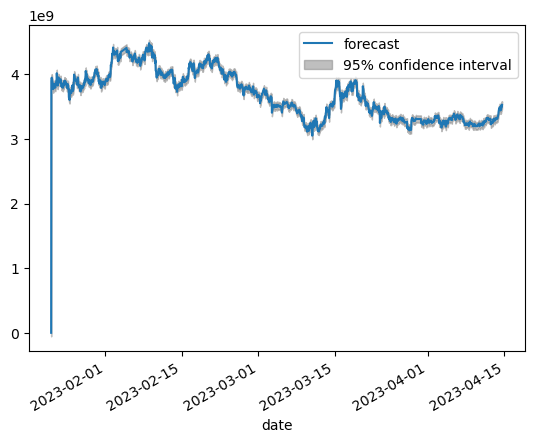

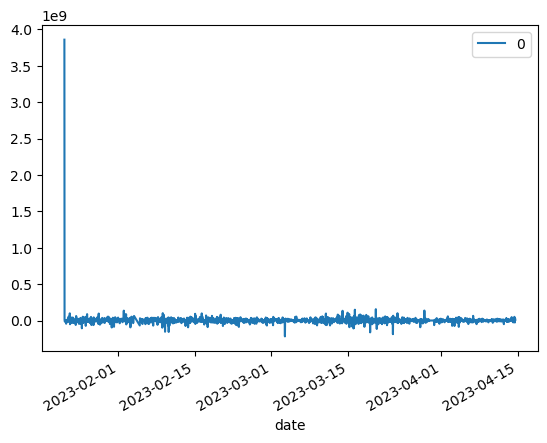

In [34]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [35]:
fore = model_fit.forecast(steps=5)
print(fore)

1944    3.535924e+09
1945    3.534985e+09
1946    3.534178e+09
1947    3.533677e+09
1948    3.533494e+09
Name: predicted_mean, dtype: float64


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


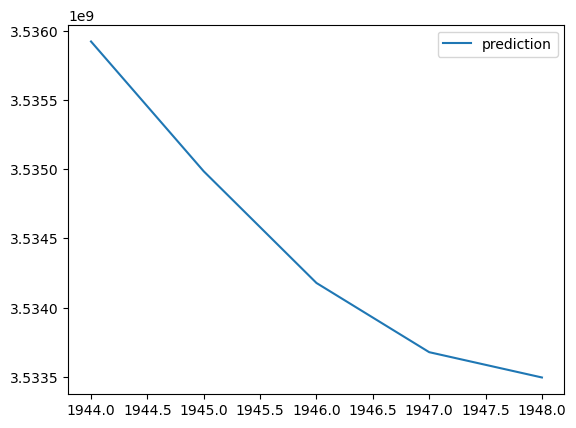

In [36]:
plt.plot(fore, label='prediction')
plt.legend()
plt.show()

### 가격 변화율로 ARIMA
- 1시간
- 24시간
- 7일

In [37]:
ratio_df = pd.DataFrame()

In [38]:
# 1시간 가격변화율 뽑기
ratio_df['date'] = df['_time'].values
ratio_df['1HChange'] = df['priceChangePercentage1H'].values
ratio_df

,date,1HChange
0,2023-01-22T03:17:05.617Z,-0.485600
1,2023-01-22T04:00:02.782Z,1.262951
2,2023-01-22T05:00:02.824Z,0.109195
3,2023-01-22T06:00:03.313Z,-0.008200
4,2023-01-22T07:00:02.713Z,-0.020446
...,...,...
1939,2023-04-14T09:59:01.944Z,1.296546
1940,2023-04-14T10:59:01.968Z,0.446129
1941,2023-04-14T12:00:03.586Z,-0.559009
1942,2023-04-14T13:00:03.269Z,1.067752


In [39]:
ratio_df['date'] = pd.to_datetime(ratio_df['date'])
ratio_df = ratio_df.set_index('date')
ratio_df

,1HChange
date,
2023-01-22 03:17:05.617000+00:00,-0.485600
2023-01-22 04:00:02.782000+00:00,1.262951
2023-01-22 05:00:02.824000+00:00,0.109195
2023-01-22 06:00:03.313000+00:00,-0.008200
2023-01-22 07:00:02.713000+00:00,-0.020446
...,...
2023-04-14 09:59:01.944000+00:00,1.296546
2023-04-14 10:59:01.968000+00:00,0.446129
2023-04-14 12:00:03.586000+00:00,-0.559009


<Axes: xlabel='date'>

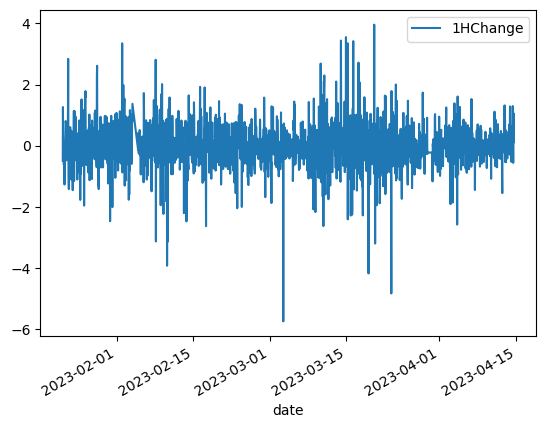

In [40]:
ratio_df.plot()

### 정상성 test

In [41]:
adf_test(ratio_df)

ADF Statistics: -44.308551
p-value: 0.000000
Critical values: 
	1%: -3.434
	5%: -2.863
	10%: -2.568


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


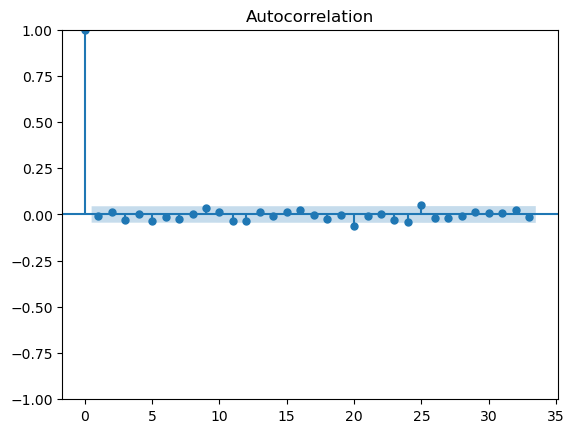

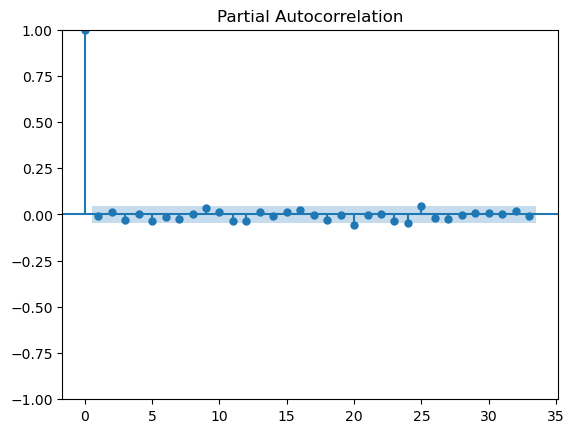

In [42]:
plot_acf(ratio_df)
plot_pacf(ratio_df)
plt.show()

### 파라미터 값 찾기

In [43]:
from pmdarima.arima import auto_arima

model_arima = auto_arima(ratio_df,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(ratio_df)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4327.038, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4328.979, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4330.693, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=4330.959, Time=0.11 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=4332.940, Time=0.13 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=4332.357, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4328.977, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4329.468, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4330.837, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4331.376, Time=0.41 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=4333.007, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4330.676, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4330.866, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4332.197, Time=0.54 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=4331.840, Time=0.76 sec
 ARIMA(3,0

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [44]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(ratio_df, test_size=0.2, shuffle=False)

In [45]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

# f = open('ARIMA(1,0,0)_1hchange_result.txt','w')

model = SARIMAX(train_df, order=(1,0,0), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
# print(model_fit.summary(),file=f)
print(model_fit.summary())

# f.close()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17689D+00    |proj g|=  6.53122D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   6.531D+00   1.177D+00
  F =   1.1768875274758517     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:               1HChange   No. Observations:                 1555
Model:               SARIMAX(1, 0, 0

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


<Axes: xlabel='date'>

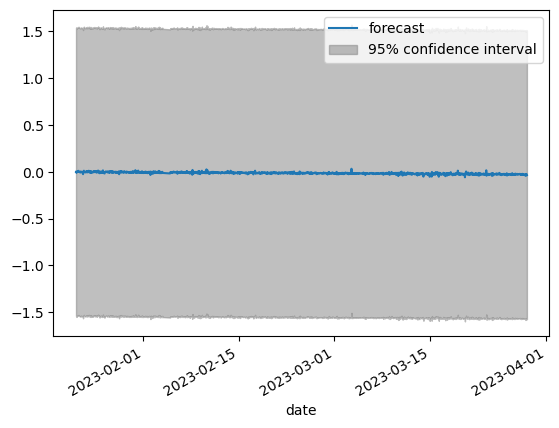

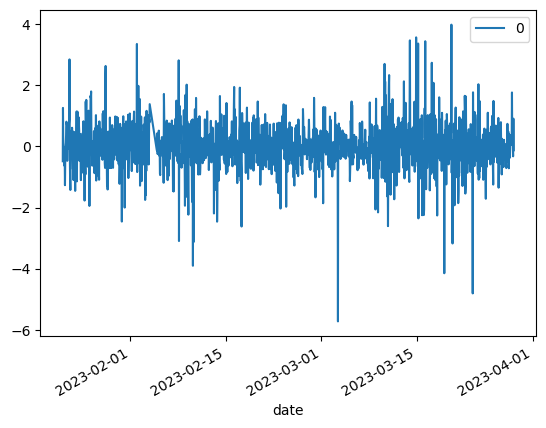

In [46]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [47]:
# test 데이터 개수만큼 예측값 뽑기
fore = model_fit.get_forecast(steps=len(test_df.index), alpha=0.05).summary_frame()
fore

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1HChange,mean,mean_se,mean_ci_lower,mean_ci_upper
1555,-0.026468,0.785172,-1.565377,1.512440
1556,-0.027672,0.785201,-1.566638,1.511295
1557,-0.027679,0.785201,-1.566646,1.511287
1558,-0.027697,0.785201,-1.566664,1.511270
1559,-0.027715,0.785201,-1.566681,1.511252
...,...,...,...,...
1939,-0.034470,0.785201,-1.573437,1.504496
1940,-0.034488,0.785201,-1.573455,1.504479
1941,-0.034506,0.785201,-1.573472,1.504461
1942,-0.034523,0.785201,-1.573490,1.504443


In [48]:
fc = tuple(fore['mean'].values) # 예측값
se = tuple(fore['mean_se'].values) # 표준오차
lower_coef = tuple(fore['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(fore['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_df.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_df.index)
upper_data = pd.Series(upper_coef, index = test_df.index )

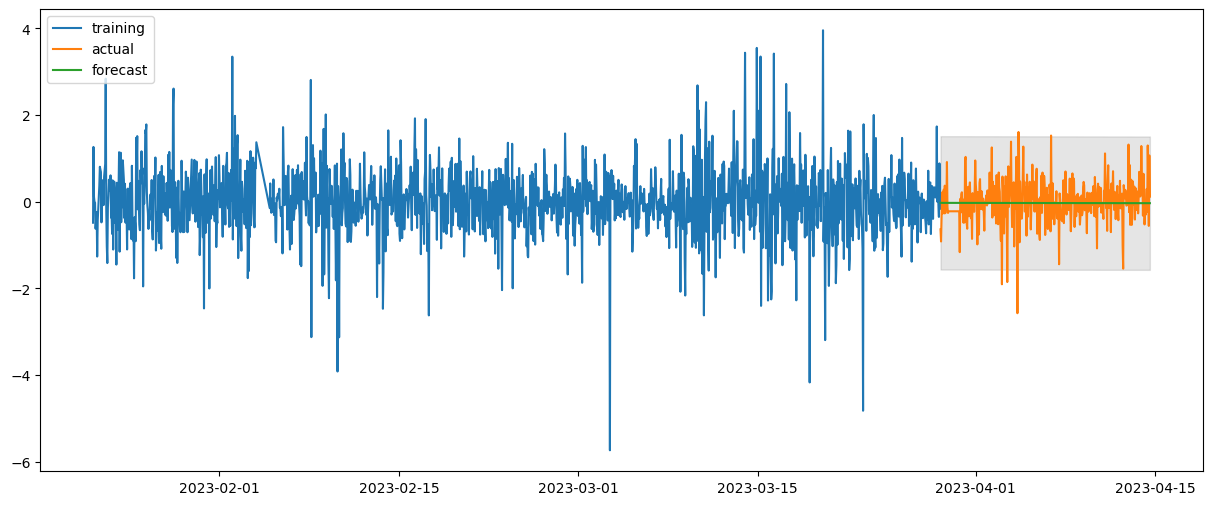

In [49]:
#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_df, label = 'training')
plt.plot(test_df, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_df.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()

### 7일 단위 변화량

In [50]:
change7d = pd.DataFrame()

In [51]:
# 7일 가격변화율 뽑기
change7d['date'] = df['_time'].values
change7d['7dChange'] = df['priceChangePercentage7d'].values
change7d

,date,7dChange
0,2023-01-22T03:17:05.617Z,6.656563
1,2023-01-22T04:00:02.782Z,7.972070
2,2023-01-22T05:00:02.824Z,8.015461
3,2023-01-22T06:00:03.313Z,8.245199
4,2023-01-22T07:00:02.713Z,8.027613
...,...,...
1939,2023-04-14T09:59:01.944Z,5.673736
1940,2023-04-14T10:59:01.968Z,6.251174
1941,2023-04-14T12:00:03.586Z,5.666161
1942,2023-04-14T13:00:03.269Z,6.480040


In [52]:
change7d['date'] = pd.to_datetime(change7d['date'])
change7d = change7d.set_index('date')
change7d.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1944 entries, 2023-01-22 03:17:05.617000+00:00 to 2023-04-14 14:00:03.665000+00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   7dChange  1944 non-null   float64
dtypes: float64(1)
memory usage: 30.4 KB


In [53]:
adf_test(change7d)

ADF Statistics: -2.472140
p-value: 0.122401
Critical values: 
	1%: -3.434
	5%: -2.863
	10%: -2.568


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


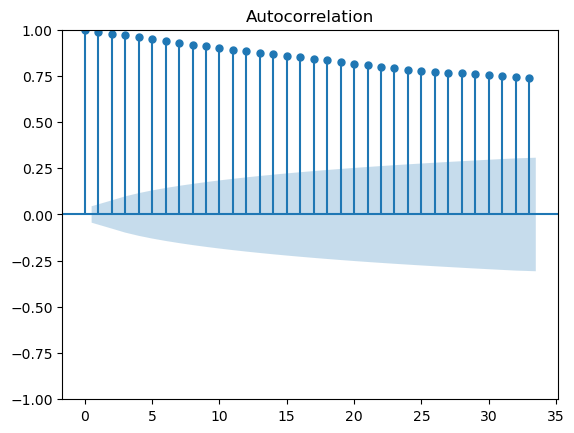

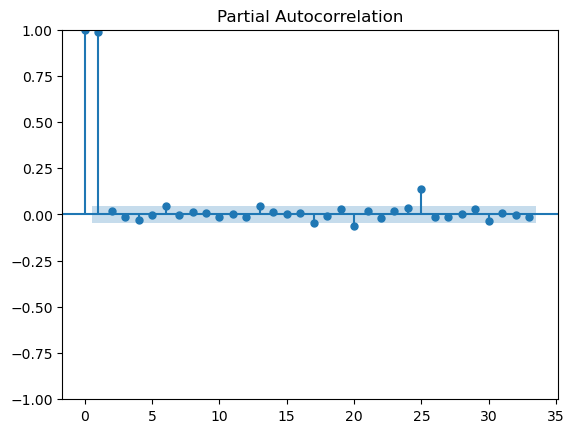

In [54]:
plot_acf(change7d)
plot_pacf(change7d)
plt.show()

In [55]:
from pmdarima.arima import auto_arima

model_arima = auto_arima(change7d,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(change7d)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6078.018, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6078.677, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6080.281, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6081.497, Time=0.21 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=6083.462, Time=0.27 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=6082.645, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6078.641, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6080.517, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6082.032, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6083.490, Time=0.55 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=6084.713, Time=1.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6080.339, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6082.104, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6079.699, Time=1.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6081.524, Time=2.37 sec
 ARIMA(3,1

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [56]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(change7d, test_size=0.2, shuffle=False)

In [57]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

# f = open('ARIMA_24Hchange_result.txt','w')

model = SARIMAX(train_df, order=(0,1,0), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

# f.close()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
            

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63518D+00    |proj g|=  2.60704D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   2.607D+00   1.635D+00
  F =   1.6351839830417041     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:               7dChange   No. Observations:                 1555
Model:               SARIMAX(0, 1, 0

<Axes: xlabel='date'>

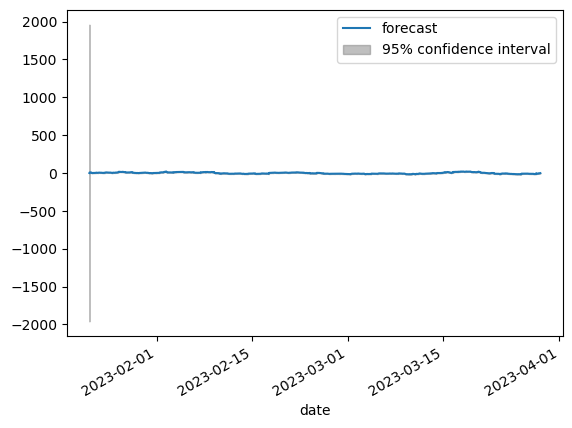

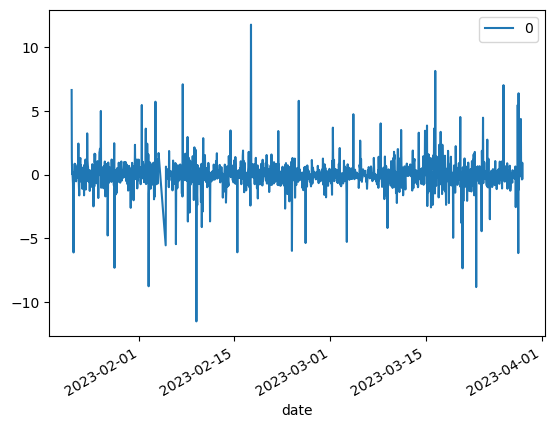

In [58]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [59]:
# test 데이터 개수만큼 예측값 뽑기
fore = model_fit.get_forecast(steps=len(test_df.index), alpha=0.05).summary_frame()
fore

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


7dChange,mean,mean_se,mean_ci_lower,mean_ci_upper
1555,-2.195319,1.242714,-4.630994,0.240355
1556,-2.197803,1.757463,-5.642367,1.246761
1557,-2.200288,2.152444,-6.419000,2.018424
1558,-2.202775,2.485428,-7.074124,2.668574
1559,-2.205263,2.778793,-7.651597,3.241071
...,...,...,...,...
1939,-3.266408,24.383809,-51.057796,44.524980
1940,-3.269504,24.415456,-51.122919,44.583910
1941,-3.272603,24.447062,-51.187963,44.642758
1942,-3.275702,24.478627,-51.252929,44.701525


In [60]:
fc = tuple(fore['mean'].values) # 예측값
se = tuple(fore['mean_se'].values) # 표준오차
lower_coef = tuple(fore['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(fore['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_df.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_df.index)
upper_data = pd.Series(upper_coef, index = test_df.index )

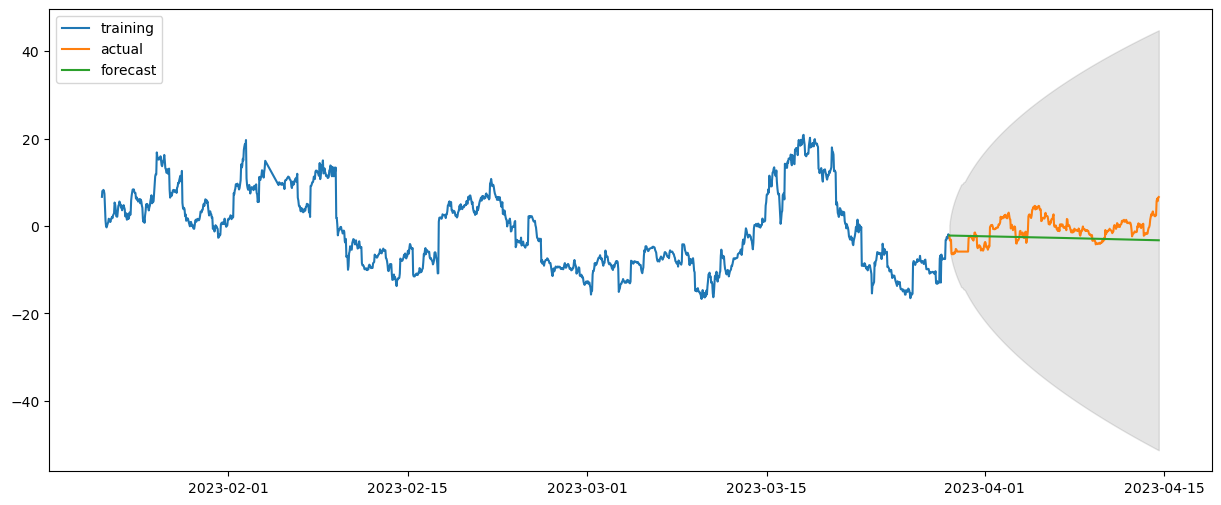

In [61]:
#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_df, label = 'training')
plt.plot(test_df, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_df.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()

### 24H 가격 변화량 뽑기

In [62]:
change24h = pd.DataFrame()

In [63]:
# 7일 가격변화율 뽑기
change24h['date'] = df['_time'].values
change24h['24hChange'] = df['priceChangePercentage24H'].values
change24h

,date,24hChange
0,2023-01-22T03:17:05.617Z,4.076443
1,2023-01-22T04:00:02.782Z,5.109553
2,2023-01-22T05:00:02.824Z,4.756726
3,2023-01-22T06:00:03.313Z,2.355746
4,2023-01-22T07:00:02.713Z,2.552304
...,...,...
1939,2023-04-14T09:59:01.944Z,6.090325
1940,2023-04-14T10:59:01.968Z,6.467143
1941,2023-04-14T12:00:03.586Z,5.551262
1942,2023-04-14T13:00:03.269Z,6.575718


In [64]:
change24h['date'] = pd.to_datetime(change24h['date'])
change24h = change24h.set_index('date')
change24h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1944 entries, 2023-01-22 03:17:05.617000+00:00 to 2023-04-14 14:00:03.665000+00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   24hChange  1944 non-null   float64
dtypes: float64(1)
memory usage: 30.4 KB


In [65]:
adf_test(change24h)

ADF Statistics: -5.625950
p-value: 0.000001
Critical values: 
	1%: -3.434
	5%: -2.863
	10%: -2.568


/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


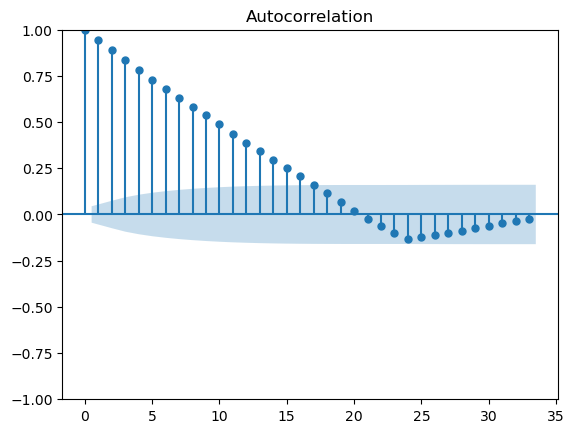

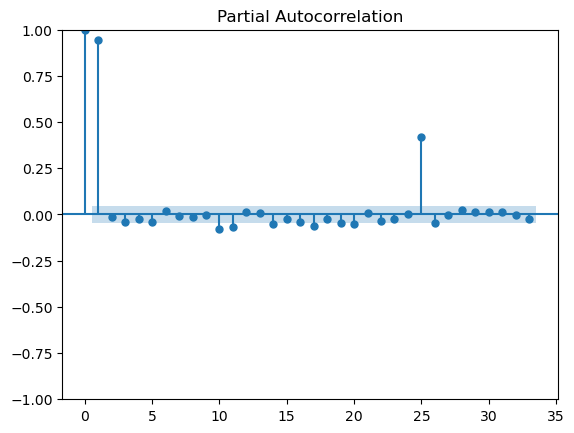

In [66]:
plot_acf(change24h)
plot_pacf(change24h)
plt.show()

In [67]:
from pmdarima.arima import auto_arima

model_arima = auto_arima(change24h,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=5,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)

model_arima.fit(change24h)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10280.532, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8437.981, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=7406.957, Time=0.26 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=6922.714, Time=0.35 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=6581.907, Time=0.43 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=6385.364, Time=0.46 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5886.371, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5888.072, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5886.542, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5887.266, Time=0.20 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=5885.432, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5888.043, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5889.871, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5875.816, Time=0.37 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5877.759, Time=0.59 sec
 ARIMA(3,

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [68]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(change24h, test_size=0.2, shuffle=False)

In [69]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm
import sys

# f = open('ARIMA_24Hchange_result.txt','w')

model = SARIMAX(train_df, order=(3,0,1), trend='t')
# trend = t: 시간에 따른 추세 변화 모델링

model_fit = model.fit(full_output = True, disp = 1)
print(model_fit.summary())

# f.close()

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56870D+00    |proj g|=  3.60000D+00

At iterate    1    f=  1.56870D+00    |proj g|=  8.91602D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     43      2     0     0   8.916D-03   1.569D+00
  F =   1.5686980651048230     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                               SARIMAX Results                                
Dep. Variable:              24hChange   No. Observations:                 1555
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -2439.325
Date:                Tue, 16 May 2023   AIC                           4890.651
Time:                        13:40:33   BIC                           4922.746
Sample:                     

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


<Axes: xlabel='date'>

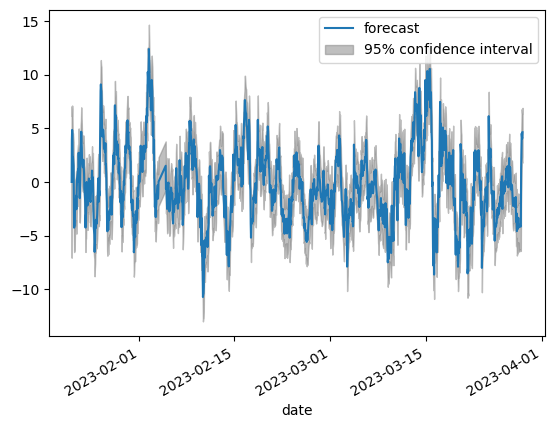

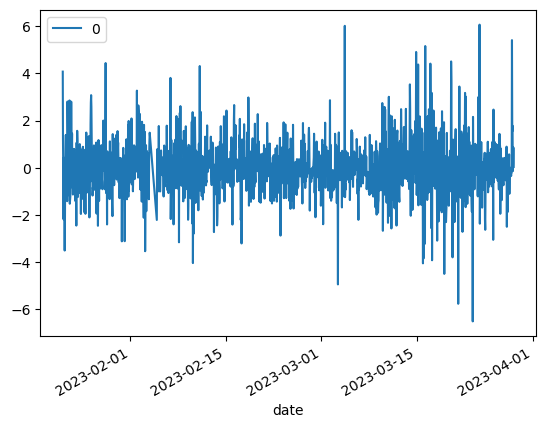

In [70]:
fig, ax = plt.subplots()
fig = plot_predict(model_fit, ax = ax)# 학습데이터 예측 결과
res = pd.DataFrame(model_fit.resid)# 잔차 변동 시각화
res.plot()

In [71]:
# test 데이터 개수만큼 예측값 뽑기
fore = model_fit.get_forecast(steps=len(test_df.index), alpha=0.05).summary_frame()
fore

/Users/yoonjiha/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


24hChange,mean,mean_se,mean_ci_lower,mean_ci_upper
1555,4.385970,1.159481,2.113429,6.658512
1556,4.071357,1.612315,0.911278,7.231437
1557,3.786552,1.966395,-0.067511,7.640616
1558,3.512792,2.223073,-0.844352,7.869936
1559,3.258553,2.431051,-1.506220,8.023325
...,...,...,...,...
1939,-0.760900,3.602480,-7.821632,6.299831
1940,-0.761296,3.602480,-7.822027,6.299436
1941,-0.761691,3.602480,-7.822422,6.299040
1942,-0.762087,3.602480,-7.822818,6.298645


In [72]:
fc = tuple(fore['mean'].values) # 예측값
se = tuple(fore['mean_se'].values) # 표준오차
lower_coef = tuple(fore['mean_ci_lower'].values) # 신뢰구간 최소
upper_coef = tuple(fore['mean_ci_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_df.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_df.index)
upper_data = pd.Series(upper_coef, index = test_df.index )

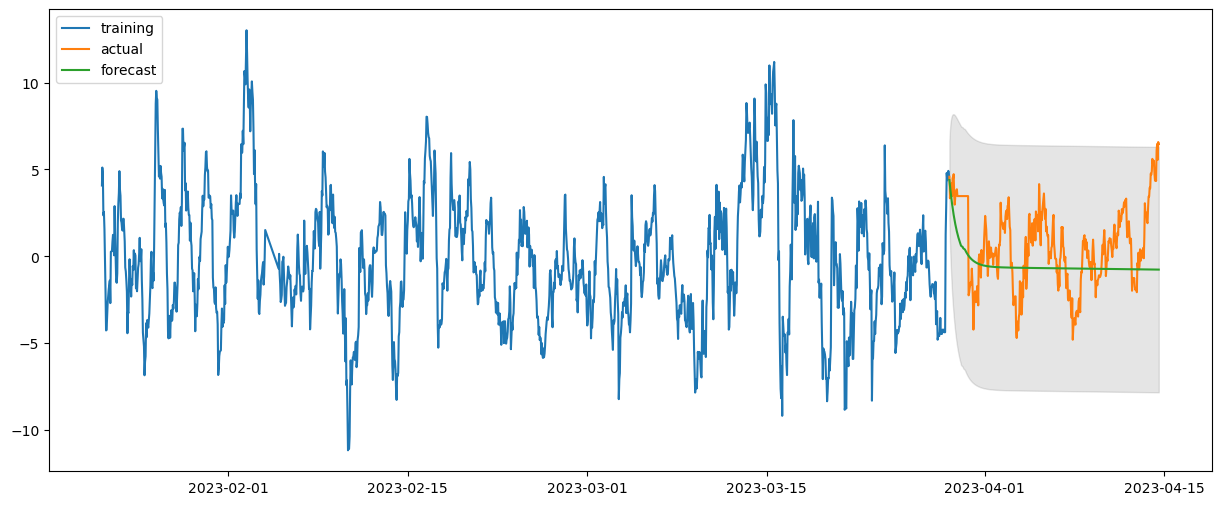

In [73]:
#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_df, label = 'training')
plt.plot(test_df, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_df.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()

### 결론
- ARIMA로 가격/가격변화율을 예측하는 데에는 한계가 있다.
- 그래도 가격보다는 가격변화율 데이터가 정상성을 갖고 있으며 ARIMA 모델에 적합한 데이터였다.
- 가격변화율 데이터는 ARIMA 모델에서 예측력은 p-value가 낮게 나오며 AIC, BIC 값도 상대적으로 적게 나와 유의미하다고 해석할 수 있었지만, 막상 실제 데이터와 비교해보니 제대로 된 예측을 하지는 못한다는 것을 알 수 있었다.
- 가격변화율 중에서도 1시간 < 7일 < 1일 순으로 대략적 흐름은 예측력이 있었다.
- 가격이나 가격변화율을 예측하는 데에는 이 데이터 말고도 다른 요소들이 필요하기 때문인 것 같다.